In [1]:
!pip install git+https://github.com/SberProcessMining/Sber_Process_Mining.git
!pip install -U matplotlib
!pip install pm4py
#!pip install pomegranate
!pip install scikit-network

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/SberProcessMining/Sber_Process_Mining.git to /tmp/pip-req-build-sfyx2g68
  Running command git clone -q https://github.com/SberProcessMining/Sber_Process_Mining.git /tmp/pip-req-build-sfyx2g68
     |████████████████████████████████| 786 kB 7.7 MB/s 
     |████████████████████████████████| 10.3 MB 43.1 MB/s 
     |████████████████████████████████| 583 kB 55.5 MB/s 
     |████████████████████████████████| 55 kB 4.5 MB/s 
     |████████████████████████████████| 381 kB 46.4 MB/s 
     |████████████████████████████████| 8.2 MB 43.1 MB/s 
  Created wheel for sberpm: filename=sberpm-1.3.1-py3-none-any.whl size=133684 sha256=1e4f9739fe9542fdff031ecda28998ed27f398f3ada58738d428e890b9d4dde0
  Stored in directory: /tmp/pip-ephem-wheel-cache-ulgkb6tg/wheels/1f/6a/19/b183038f4ef480691dc824ce6ff064a8d4a121ae9c0a355187
Successfully built sberpm
  Attempting uninstall: setupt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 9.3 MB/s 
     |████████████████████████████████| 944 kB 58.3 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.4.3
    Uninstalling matplotlib-3.4.3:
      Successfully uninstalled matplotlib-3.4.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sberpm 1.3.1 requires matplotlib~=3.4.2, but you have matplotlib 3.5.2 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 8.3 MB/s 
  Created wheel for pyvis: filename=pyvis-0.2.1-py3-none-any.whl size=23667 sha256=47d09fa2263b8558b150638eb4a5d4ee99751cf75f04a288ba8ad77caf49f273
  Stored in directory: /root/.cache/pip/wheels/2a/8f/04/6340d46afc74f59cc857a594ca1a2a14a1f4cbd4fd6c2e9306
  Created wheel for stringdist: filename=StringDist-1.0.9-cp37-cp37m-linux_x86_64.whl size=23608 sha256=1d2bd96dca87e8053447384051db0e11c101e0ea4a4d8ed4d60ba320eccbef37
  Stored in directory: /root/.cache/pip/wheels/d7/9c/d4/63bc3d8931de0980b9e4a724dea290bb40b8b1b2bd6227c8da
Successfully built pyvis stringdist
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.1 MB 7.8 MB/s 


In [2]:
!pip install -U multiplex-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 78 kB 4.2 MB/s 
  Created wheel for multiplex-plot: filename=multiplex_plot-0.5.0-py3-none-any.whl size=86881 sha256=9a4058487e74cb4fa93d1aca4a1e49527d04a16dede075bd60d1d75d115ccd45
  Stored in directory: /root/.cache/pip/wheels/0e/dc/d3/dbe10de1ba29ad5b1a0cd778e70e42a33595f25f84b7b83a5a
Successfully built multiplex-plot


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import sys
sys.path.append('/content/drive/MyDrive/Drill planner/Code')

In [36]:
import sberpm
import pandas as pd
from sberpm.miners import SimpleMiner,CausalMiner, HeuMiner,AlphaPlusMiner, AlphaMiner, InductiveMiner
from sberpm.miners._abstract_miner import AbstractMiner
%matplotlib inline
from sberpm.visual import GraphvizPainter
import matplotlib.pyplot as plt
from sberpm import DataHolder
import networkx as nx
from sberpm.metrics import ActivityMetric, TransitionMetric, IdMetric, TraceMetric, UserMetric,TokenReplay
import numpy as np
import pm4py
#import pomegranate
from Drill_planner import DrillPlaner, nx_graph, GraphMiner, DrillGraphMiner
import sknetwork
from IPython.display import SVG
import missingno as msno
import seaborn as sns
from multiplex import drawable
import multiplex
import pandas as pd
from sknetwork.visualization import svg_graph, svg_digraph, svg_bigraph
from sknetwork.path import get_shortest_path
import seaborn as sns
import os
import importlib

In [4]:
# https://graph-tool.skewed.de/static/doc/index.html 

# Data loading

In [5]:
def DFG_calc(edges,time):
  G = nx.DiGraph()

  for k,w in zip(edges,time):
    G.add_edge(k[0],k[1],weight =w )
  return G

In [6]:
data = pd.read_excel('/content/drive/MyDrive/Drill planner/Data/Dataset2.xlsx')

In [8]:
data['Operation code'] = data['Operation code'].astype(int)
burek = data[data['Phase'] == 'БУРЭК']
burek['Operation code'] = burek['Operation code'].astype(int)
data_holder = DataHolder(data=data, 
                         id_column='Well number', 
                         activity_column='Operation code', 
                         start_timestamp_column='Timestamp', 
                         time_format='%Y.%m.%d')

/usr/local/lib/python3.7/dist-packages/sberpm/_holder.py:277: UserWarning: DataHolder: column Well number has 1 None values, the corresponding rows will be removed.
  f'the corresponding rows will be removed.', UserWarning)


In [9]:
# finding all traces
_dh = data_holder
cols_to_aggregate = [data_holder.activity_column]
if data_holder.user_column is not None:
        cols_to_aggregate.append(data_holder.user_column)
_grouped_data = data_holder.get_grouped_data(*cols_to_aggregate)  # id_column and traces


duration_df = data_holder.data.groupby(data_holder.id_column)['Time, h (in grains)'].sum()
_grouped_data = _grouped_data.join(duration_df, on=data_holder.id_column)

_group_column = data_holder.activity_column
_group_data = _grouped_data.groupby(_group_column)
_traces = pd.DataFrame({_dh.activity_column: _grouped_data[_dh.activity_column].unique()}) \
.set_index(_dh.activity_column, drop=False)[_dh.activity_column]  # pandas.Series

len(_traces)

11

## Changing operation time by median time from the offset

In [10]:
# import stats
ROP_phase = pd.read_csv('/content/drive/MyDrive/Drill planner/Data/ROP_per_phase.csv')
stats = pd.read_csv('/content/drive/MyDrive/Drill planner/Data/stat_per_phase.csv')

In [11]:
stats

Phase  Operation code       min       mean    median  percentile_30  \
0    БУРКОН             201  0.166667  10.193773  7.666667       4.533333   
1    БУРКОН             212  1.250000   2.620370  2.416667       1.700000   
2    БУРКОН             305  0.333333   2.558421  2.125000       0.850000   
3    БУРКОН             310  1.583333   3.747222  3.666667       3.000000   
4    БУРКОН             323  0.083333   0.701389  0.333333       0.191667   
..      ...             ...       ...        ...       ...            ...   
427  КРЕПЭК             805  0.916667   4.475000  2.458333       1.808333   
428  КРЕПЭК             811  5.000000   7.333333  5.000000       5.000000   
429  КРЕПЭК             812  3.500000   3.500000  3.500000       3.500000   
430  КРЕПЭК             813  2.000000   2.000000  2.000000       2.000000   
431  КРЕПЭК             815  8.333333   8.333333  8.333333       8.333333   

     percentile_50  percentile_90  
0         7.666667      19.583333  
1         2.416667       4.033333  
2         2.125000       5.275000  
3         3.666667       5.458333  
4         0.333333       0.983333  
..             ...            ...  
427       2.458333       9.975000  
428       5.000000      10.600000  
429       3.500000       3.500000  
430       2.000000       2.000000  
431       8.333333       8.333333  

[432 rows x 8 columns]

In [14]:
data['Median_time'] = 0
for phase in data['Phase'].unique():
  for code in data['Operation code'].unique():
    try:
      median_time = stats.loc[(stats['Phase']== phase) & (stats['Operation code']== code),'median'].values[0]
      data.loc[ (data['Phase'] == phase) & (data['Operation code'] == code),'Median_time' ] = median_time
    except:
      continue



In [15]:
data['Median_time']

0       1.083333
1       3.750000
2       0.750000
3       1.083333
4       1.250000
          ...   
5522    0.333333
5523    2.291667
5524    1.666667
5525    6.333333
5526    6.416667
Name: Median_time, Length: 5527, dtype: float64

# Planner based on SberPM process miners

In [16]:
data['Operation code'] = data['Operation code'].astype(int)
burek = data[data['Phase'] == 'БУРЭК']
burek['Operation code'] = burek['Operation code'].astype(int)
data_holder = DataHolder(data=data, 
                         id_column='Well number', 
                         activity_column='Operation code', 
                         start_timestamp_column='Timestamp', 
                         time_format='%Y.%m.%d')

/usr/local/lib/python3.7/dist-packages/sberpm/_holder.py:277: UserWarning: DataHolder: column Well number has 1 None values, the corresponding rows will be removed.
  f'the corresponding rows will be removed.', UserWarning)


In [18]:
planner = DrillPlaner(SimpleMiner,data_holder,burek,'Time, h (in grains)',stats)

In [19]:
graph_planner = DrillGraphMiner(burek, 'Median_time', 'Operation code')
DFG =graph_planner.to_dfg()
DFG.nodes

NodeView(('startevent', 401, 402, 403, 406, 407, 410, 415, 416, 418, 419, 420, 805, 421, 425, 426, 811, 429, 814, 305, 437, 310, 313, 323, 324, 708, 201, 202, 204, 212, 213, 342, 343, 346, 347, 348, 613, 'endevent'))

In [21]:
gen =nx.all_shortest_paths(DFG, source= 'startevent', target='endevent', weight='weight', method='dijkstra')

In [22]:
planner.digraph()
planner.oneshortest('startevent','endevent')

{('startevent', '305', '347', '201', '348', '601', 'endevent'): 4.49}

In [23]:
planner = DrillPlaner(SimpleMiner,data_holder,burek,'Time, h (in grains)',stats)
planner.digraph()
planner.oneshortest(source='startevent',target='endevent')

{('startevent', '305', '347', '201', '348', '601', 'endevent'): 4.49}

In [24]:
planner = DrillPlaner(CausalMiner,data_holder,burek,'Time, h (in grains)',stats)
planner.digraph()
planner.oneshortest(source='startevent',target='endevent')

{('startevent', '305', '323', '311', '601', 'endevent'): 6.08}

In [25]:
DFG = planner.digraph()

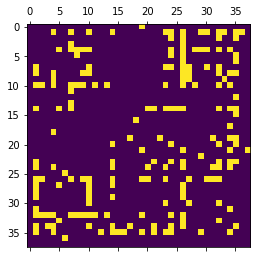

In [26]:
plt.matshow(graph_planner.graph_matrix>0)

In [27]:
adjacency = nx.to_scipy_sparse_matrix(DFG)
names = np.array(list(DFG.nodes))
pos = nx.spring_layout(DFG, seed=100,iterations=0) # positions for all nodes - seed for reproducibility
pos = np.array(list(pos.values()))
weights = np.array(list(nx.get_edge_attributes(DFG, "weight").values()))

In [28]:
# shortest path
klimt = 10
vinci = 12
path = get_shortest_path(adjacency, sources=klimt, targets=vinci)

# visualization
edge_labels = [(path[k], path[k + 1], 0) for k in range(len(path) - 1)]

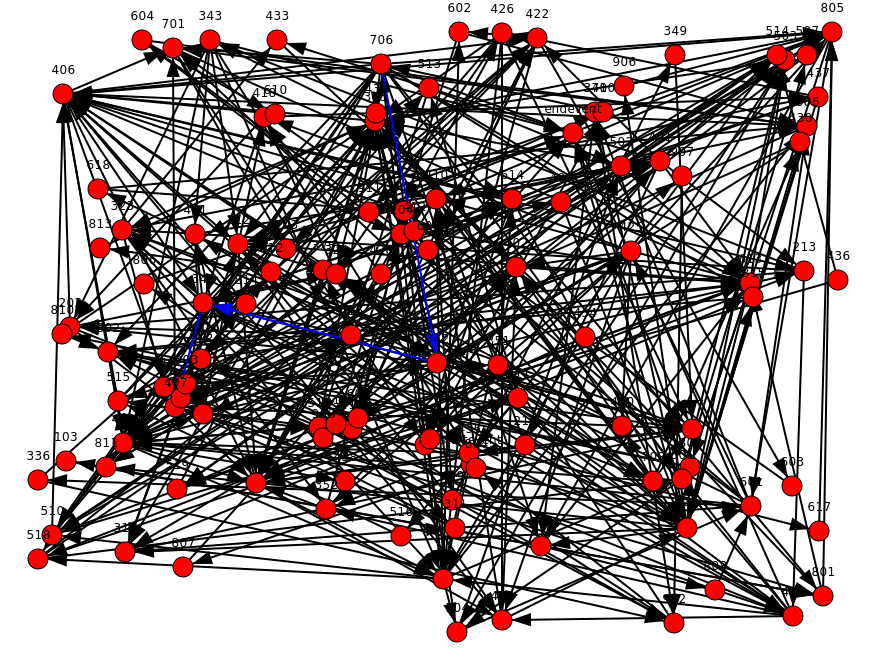

In [29]:
image = svg_digraph(adjacency, pos, names, name_position='above', node_color='red',node_size=10,edge_color='black',edge_width=2,edge_labels=edge_labels,
                    height = 600,width = 800, #edge_labels =list(weights.T), 
                    display_node_weight=False, node_weights = weights ,display_edges=True, display_edge_weight=False)

SVG(image)

In [30]:
def shortest_path_calculation(graph,startevent='startevent',endevent='endevent'):
  all_paths = nx.shortest_simple_paths(G, source=startevent, target=endevent,weight='weight').__next__()

In [32]:
list(map(lambda x: (str(x[0]), str(x[1])), list(DFG.edges())))

[('startevent', '305'),
 ('305', '343'),
 ('305', '342'),
 ('305', '324'),
 ('305', '323'),
 ('305', '402'),
 ('305', '313'),
 ('305', '204'),
 ('305', '406'),
 ('305', '201'),
 ('518', 'endevent'),
 ('518', '511'),
 ('518', '514'),
 ('518', '501'),
 ('806', 'endevent'),
 ('601', 'endevent'),
 ('601', '340'),
 ('601', '604'),
 ('601', '606'),
 ('601', '618'),
 ('601', '605'),
 ('601', '336'),
 ('601', '403'),
 ('807', 'endevent'),
 ('343', 'endevent'),
 ('343', '435'),
 ('343', '202'),
 ('343', '421'),
 ('343', '310'),
 ('343', '403'),
 ('343', '212'),
 ('348', 'endevent'),
 ('348', '811'),
 ('348', '802'),
 ('348', '340'),
 ('348', '313'),
 ('348', '701'),
 ('348', '803'),
 ('348', '809'),
 ('348', '906'),
 ('348', '351'),
 ('348', '430'),
 ('348', '606'),
 ('348', '346'),
 ('348', '815'),
 ('348', '325'),
 ('803', 'endevent'),
 ('803', '802'),
 ('803', '810'),
 ('706', 'endevent'),
 ('706', '406'),
 ('706', '701'),
 ('706', '809'),
 ('706', '905'),
 ('706', '805'),
 ('706', '212'),
 

# Graph visualization using Multiplex

In [34]:
path = sys.path[0]
path = os.path.join(path, "..")
if path not in sys.path:
    sys.path.insert(1, path)

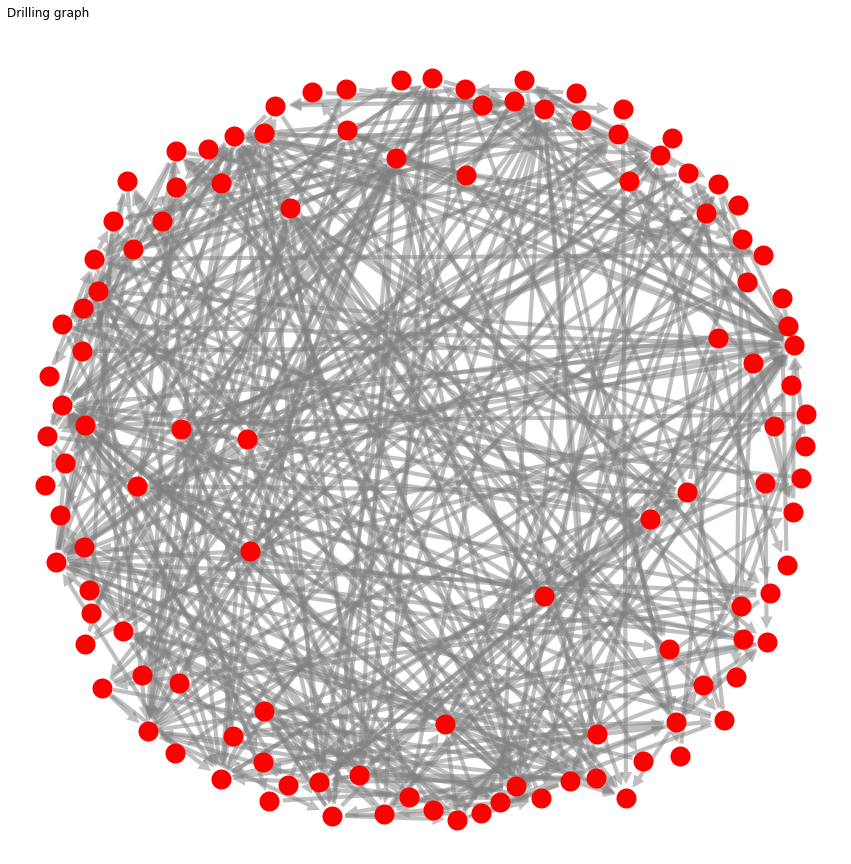

In [35]:
drawable = importlib.reload(drawable)


# create a general style
plt.style.use('tableau-colorblind10')
node_style = { 's': 400, 'color': 'r', 'linewidth': 0 }
edge_style = { 'color': 'gray', 'linewidth': 0.1, 'alpha': 0.5 }

# draw the graph
figure = plt.figure(figsize=(15, 15))
viz = drawable.Drawable(figure)
viz.set_title('Drilling graph', loc='left')

viz.draw_graph(DFG, k=3, seed=4,
               node_style=node_style, edge_style=edge_style)
viz.show()

# Metrics calculation


*   Jaccard coefficient for graph
*   Structural distnce



In [39]:
data['Operation code'] = data['Operation code'].astype(int)
burek = data[data['Phase'] == 'БУРЭК']
burek['Operation code'] = burek['Operation code'].astype(int)
data_holder = DataHolder(data=data, 
                         id_column='Well number', 
                         activity_column='Operation code', 
                         start_timestamp_column='Timestamp', 
                         time_format='%Y.%m.%d')


/usr/local/lib/python3.7/dist-packages/sberpm/_holder.py:277: UserWarning: DataHolder: column Well number has 1 None values, the corresponding rows will be removed.
  f'the corresponding rows will be removed.', UserWarning)


In [40]:

# Miner
causal_miner = CausalMiner(data_holder)
simple_miner = SimpleMiner(data_holder)
heu_miner = HeuMiner(data_holder)
alpha_plus_miner = AlphaPlusMiner(data_holder)
inductive_miner = InductiveMiner(data_holder)
alpha_miner = AlphaMiner(data_holder)

miners = [causal_miner,simple_miner,heu_miner,alpha_plus_miner] #alpha_miner]
pure_miners = [CausalMiner,SimpleMiner,HeuMiner,AlphaPlusMiner,AlphaMiner]#InductiveMiner]

for i in miners:
  i.apply()

graph = simple_miner.graph

KeyboardInterrupt: ignored

In [41]:
# behavioral and structural similarity

In [42]:
planner_miner = DrillPlaner(SimpleMiner,data_holder,burek,['Time, days'],stats)
miner_dfg = planner_miner.digraph()

In [43]:
dfg2 = list(map(str, DFG.nodes))
list(dfg2)[1] in set(planner_miner.graph_nodes)

True

In [44]:
graph_planner = DrillGraphMiner(burek, 'Median_time', 'Operation code')
DFG =graph_planner.to_dfg()
DFG.nodes

NodeView(('startevent', 401, 402, 403, 406, 407, 410, 415, 416, 418, 419, 420, 805, 421, 425, 426, 811, 429, 814, 305, 437, 310, 313, 323, 324, 708, 201, 202, 204, 212, 213, 342, 343, 346, 347, 348, 613, 'endevent'))

In [ ]:
graph_planner.graph_edges

In [47]:
set(planner_miner.graph_nodes)

{'103',
 '201',
 '202',
 '204',
 '210',
 '211',
 '212',
 '213',
 '305',
 '310',
 '311',
 '313',
 '323',
 '324',
 '325',
 '334',
 '336',
 '340',
 '342',
 '343',
 '346',
 '347',
 '348',
 '349',
 '350',
 '351',
 '352',
 '401',
 '402',
 '403',
 '406',
 '407',
 '409',
 '410',
 '411',
 '412',
 '415',
 '416',
 '417',
 '418',
 '419',
 '420',
 '421',
 '422',
 '425',
 '426',
 '428',
 '429',
 '430',
 '432',
 '433',
 '434',
 '435',
 '436',
 '437',
 '438',
 '439',
 '501',
 '502',
 '503',
 '504',
 '507',
 '510',
 '511',
 '512',
 '513',
 '514',
 '515',
 '516',
 '518',
 '519',
 '601',
 '602',
 '603',
 '604',
 '605',
 '606',
 '607',
 '608',
 '609',
 '610',
 '613',
 '614',
 '615',
 '616',
 '617',
 '618',
 '701',
 '702',
 '703',
 '704',
 '706',
 '708',
 '710',
 '801',
 '802',
 '803',
 '804',
 '805',
 '806',
 '807',
 '808',
 '809',
 '810',
 '811',
 '812',
 '813',
 '814',
 '815',
 '816',
 '903',
 '905',
 '906',
 '907',
 '908',
 '911',
 '912',
 'endevent',
 'startevent'}

In [48]:
set(planner_miner.graph_nodes).intersection(set(dfg2))

{'103',
 '201',
 '202',
 '204',
 '210',
 '211',
 '212',
 '213',
 '305',
 '310',
 '311',
 '313',
 '323',
 '324',
 '325',
 '336',
 '340',
 '342',
 '343',
 '346',
 '347',
 '348',
 '349',
 '351',
 '352',
 '401',
 '402',
 '403',
 '406',
 '407',
 '409',
 '410',
 '411',
 '412',
 '415',
 '416',
 '417',
 '418',
 '419',
 '420',
 '421',
 '422',
 '425',
 '426',
 '428',
 '429',
 '430',
 '432',
 '433',
 '434',
 '435',
 '436',
 '437',
 '438',
 '439',
 '501',
 '502',
 '503',
 '504',
 '507',
 '510',
 '511',
 '512',
 '513',
 '514',
 '515',
 '516',
 '518',
 '519',
 '601',
 '602',
 '603',
 '604',
 '605',
 '606',
 '607',
 '609',
 '610',
 '613',
 '614',
 '615',
 '616',
 '617',
 '618',
 '701',
 '702',
 '703',
 '706',
 '708',
 '710',
 '801',
 '802',
 '803',
 '804',
 '805',
 '806',
 '807',
 '808',
 '809',
 '810',
 '811',
 '812',
 '813',
 '814',
 '815',
 '903',
 '905',
 '906',
 '907',
 '908',
 '911',
 '912',
 'endevent',
 'startevent'}

In [49]:
all_nodes = list(set(planner_miner.graph_nodes).union(set(planner_miner.graph_nodes)))
NAM1 = np.zeros((len(all_nodes), len(all_nodes)))
NAM2 = np.copy(NAM1)
for NAM, graph in ((NAM1, planner_miner),(NAM2, graph_planner)):
    for edge in graph.graph_edges:
        i = all_nodes.index(edge[0])
        j = all_nodes.index(edge[1])
        NAM[i,j] = 1
np.trace((NAM1-NAM2).T@(NAM1-NAM2))

650.0

In [ ]:
pure_miners = [CausalMiner,SimpleMiner,HeuMiner,AlphaMiner,AlphaPlusMiner]#InductiveMiner]

for i in range(0,len(pure_miners)):
  pure_miners[i] = DrillPlaner(pure_miners[i],data_holder,data,['Time, days'],stats)


for miner in pure_miners:
  try:
    metric = planner_miner.IoU_metric(miner)
    metric2 = planner_miner.NAM_metric(miner)
   # print(f'{miner}')
    print(f'IoU metric:{metric}')
    print(f'Behavioral similarity metric:{metric2}')
  except:
    print(f'IoU метрика для майнера {miner} не подсчитана')
    continue

In [52]:

a = np.array([[1],[1],[0.508],[0.508],[1],[np.nan],[0.636]]).reshape(1,-1)
b = ['Simple miner','Causal miner','Alpha miner','Alpha plus miner','Heuristic miner','Inductive miner','Directed graph']
str_distance = np.array([[0],[38],[272],[272],[83],[np.nan],[2]]).reshape(1,-1)

In [53]:
codes_op = set(data['Operation code'])
#data[data['Phase'] == 'БУРХВОСТ']
phase_code_set = {a: set(data[data['Phase'] == a]['Operation code']) for a in set(data.Phase)}

frame = pd.DataFrame(codes_op)
for sd in phase_code_set.keys():
  frame[sd] = list(map(lambda x: 1.0 if x in phase_code_set[sd] else np.nan, codes_op))
a = frame.set_index(0)

# Distribution of codes by phases

<AxesSubplot:>

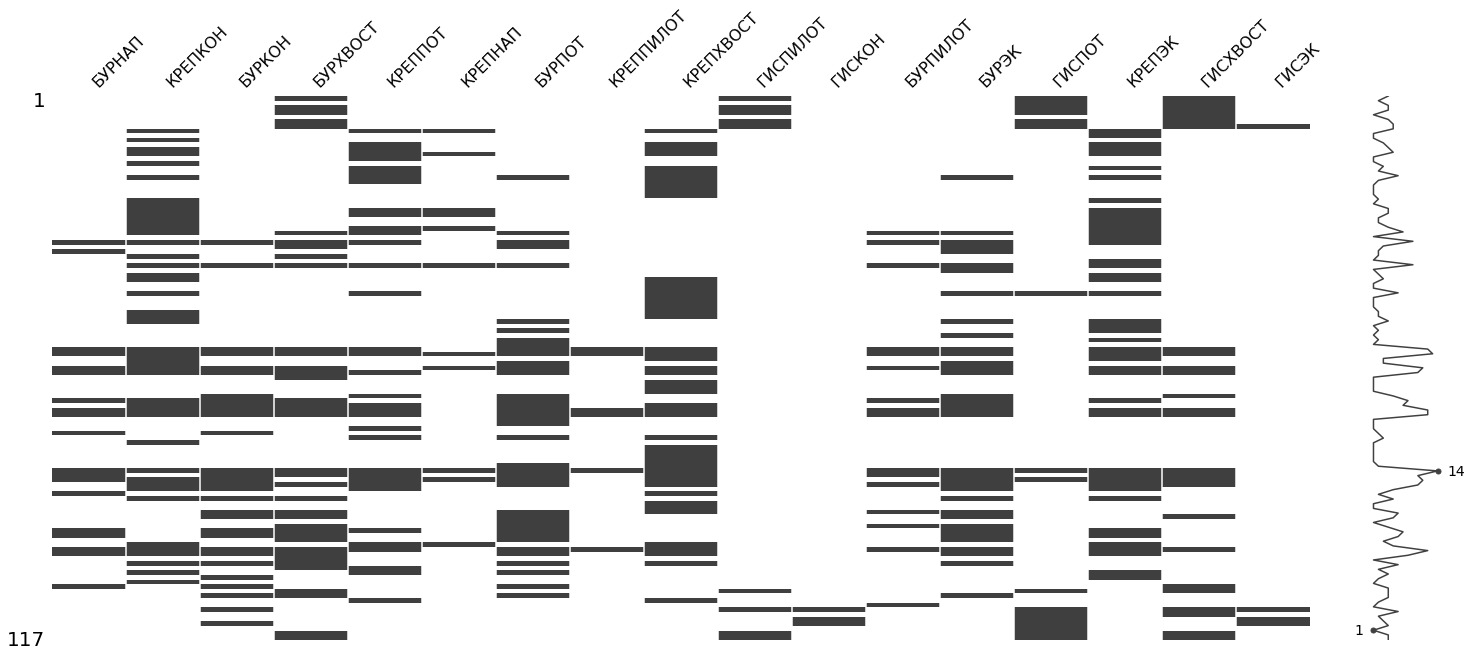

In [54]:
msno.matrix(a)


# Obtain shortest path

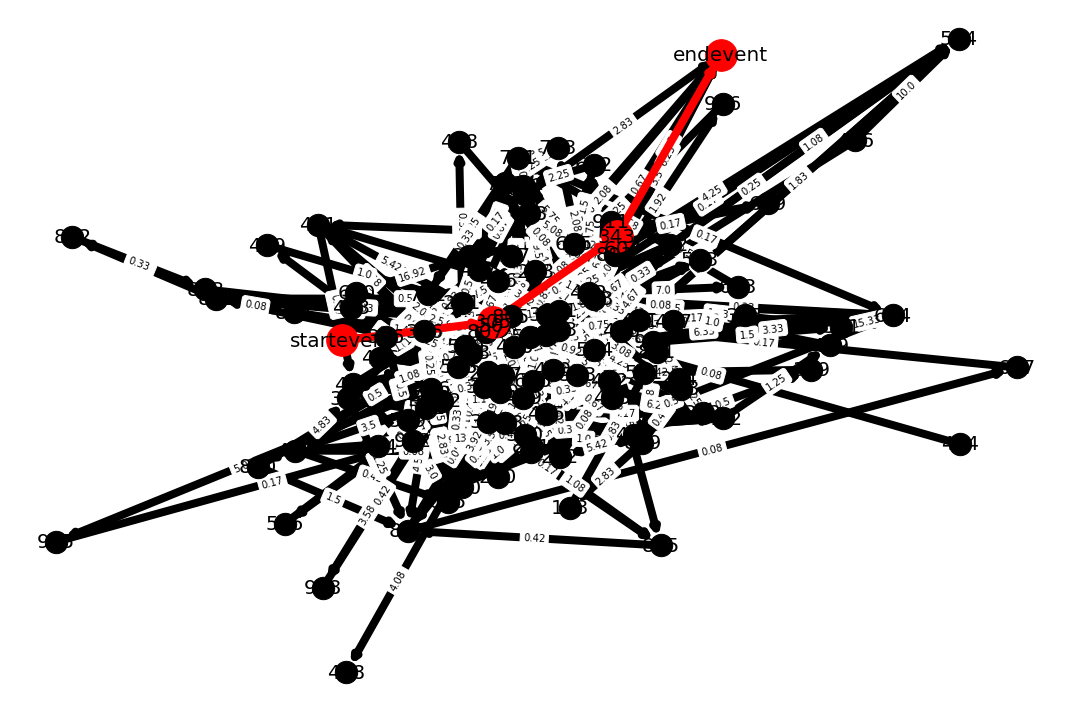

In [60]:
G = nx.DiGraph()
time = np.round(burek['Time, h (in grains)'].values,2)
for k,w in zip(causal_miner.graph.edges.keys(),time):
  G.add_edge(k[0],k[1],weight =w )
nx_graph(G,plot_shortest_path=True)

In [61]:
burkon = data[data['Phase'] == 'БУРКОН']
burhvost = data[data['Phase'] == 'БУРХВОСТ']

krephvost = data[data['Phase'] == 'КРЕПХВОСТ']
krephkon = data[data['Phase'] == 'КРЕПКОН']
krephek= data[data['Phase'] == 'КРЕПЭК']
data_holder = DataHolder(data=krephkon, 
                         id_column='Well number', 
                         activity_column='Operation code', 
                         start_timestamp_column='Timestamp', 
                         time_format='%Y.%m.%d')

In [62]:
activity_metric = ActivityMetric(data_holder, time_unit='hour')
activity_metric.apply().head()


transition_metric = TransitionMetric(data_holder, time_unit='hour')
transition_metric.apply().head()

count                                         unique_ids  \
(703, 706)     14  {3044.0, 2057.0, 3071.0, 3145.0, 2076.0, 3024....   
(606, 422)     14  {3044.0, 3071.0, 3094.0, 3145.0, 2076.0, 3024....   
(305, 347)     13  {3044.0, 2057.0, 3071.0, 3094.0, 3145.0, 2076....   
(348, 310)     13  {3044.0, 2057.0, 3071.0, 3094.0, 3145.0, 2076....   
(701, 703)      9  {3044.0, 2057.0, 3071.0, 3145.0, 2076.0, 3024....   

            unique_ids_num  aver_count_in_trace  loop_percent  throughput  \
(703, 706)               7             2.000000     50.000000    0.096718   
(606, 422)               7             2.000000     50.000000    0.196721   
(305, 347)               9             1.444444     30.769231    0.652720   
(348, 310)               8             1.625000     38.461538    0.450867   
(701, 703)               7             1.285714     22.222222    0.446281   

            total_duration  mean_duration  median_duration  max_duration  \
(703, 706)      144.750000      10.339286        12.083333     19.666667   
(606, 422)       71.166667       5.083333         2.916667     20.500000   
(305, 347)       19.916667       1.532051         1.416667      3.750000   
(348, 310)       28.833333       2.217949         2.416667      3.833333   
(701, 703)       20.166667       2.240741         2.333333      3.750000   

            min_duration  variance_duration  std_duration  
(703, 706)      0.833333      183301.658163      7.135624  
(606, 422)      0.333333      110160.714286      5.531745  
(305, 347)      0.083333        5032.840237      1.182375  
(348, 310)      0.666667        4290.532544      1.091703  
(701, 703)      0.500000        2563.580247      0.843864

In [63]:
causal_miner =CausalMiner(data_holder)
causal_miner.apply()
graph = causal_miner.graph
nodes_count_metric = activity_metric.count().to_dict()
edges_count_metric = transition_metric.count().to_dict()
mean_time_node_metric = activity_metric.mean_duration().to_dict()


graph.add_node_metric('count', nodes_count_metric)
graph.add_edge_metric('count', edges_count_metric)
graph.add_node_metric('mean_time', mean_time_node_metric)
# Visualization
painter = GraphvizPainter()



painter.apply(graph)
painter.show()
painter.write_graph("causal_miner_krep.png", format='png')

In [65]:
activity_metric = ActivityMetric(data_holder, time_unit='hour')
len(activity_metric.apply())

45

# PM4PY

In [75]:
df = pm4py.format_dataframe(burhvost,case_id='Well number',activity_key='Operation code',timestamp_key='Time, h')

In [76]:
from pm4py.algo.filtering.log.attributes import attributes_filter
activities = attributes_filter.get_attribute_values(df, "concept:name")
resources = attributes_filter.get_attribute_values(df, "org:Phase")

In [77]:
filtered_log = pm4py.filter_between(df, "201",'342')
filtered_log

Empty DataFrame
Columns: [Unnamed: 0, Well number, Section, Phase, Trip number, Data, Depth, m, Time, h, Time, days, Time, h (in grains), Type of work, Operation code, Operation description, Timestamp, ROP, m/h, Operation code extended, Median_time, case:concept:name, concept:name, time:timestamp, @@index]
Index: []

[0 rows x 21 columns]

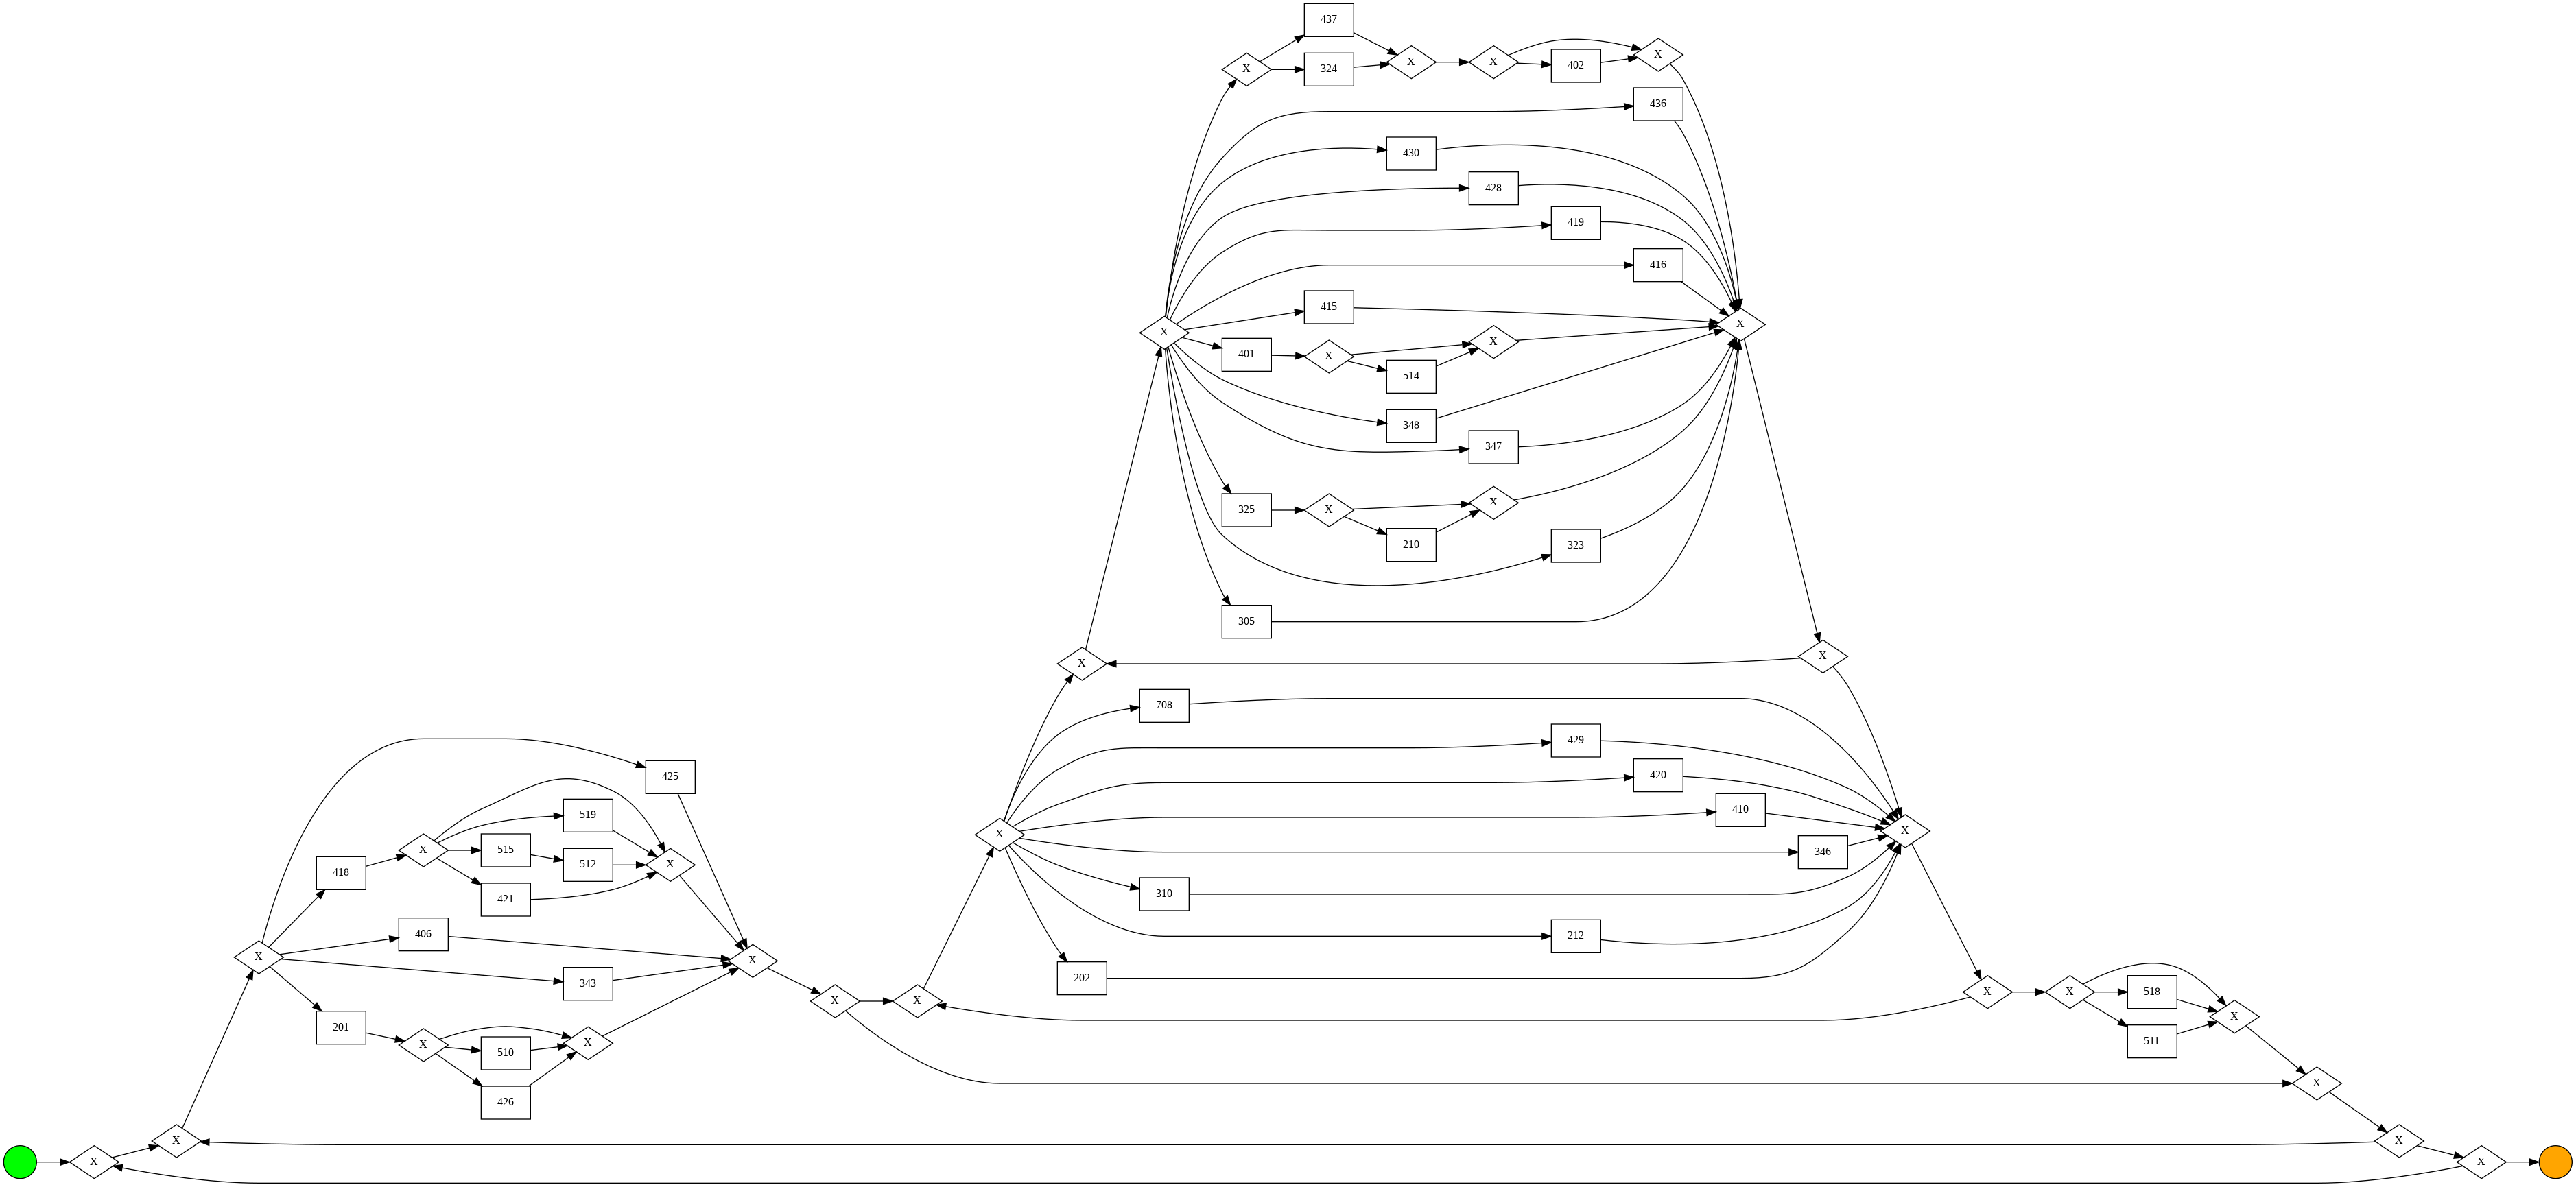

In [78]:
bpmn_model = pm4py.discover_bpmn_inductive(df)
pm4py.view_bpmn(bpmn_model)

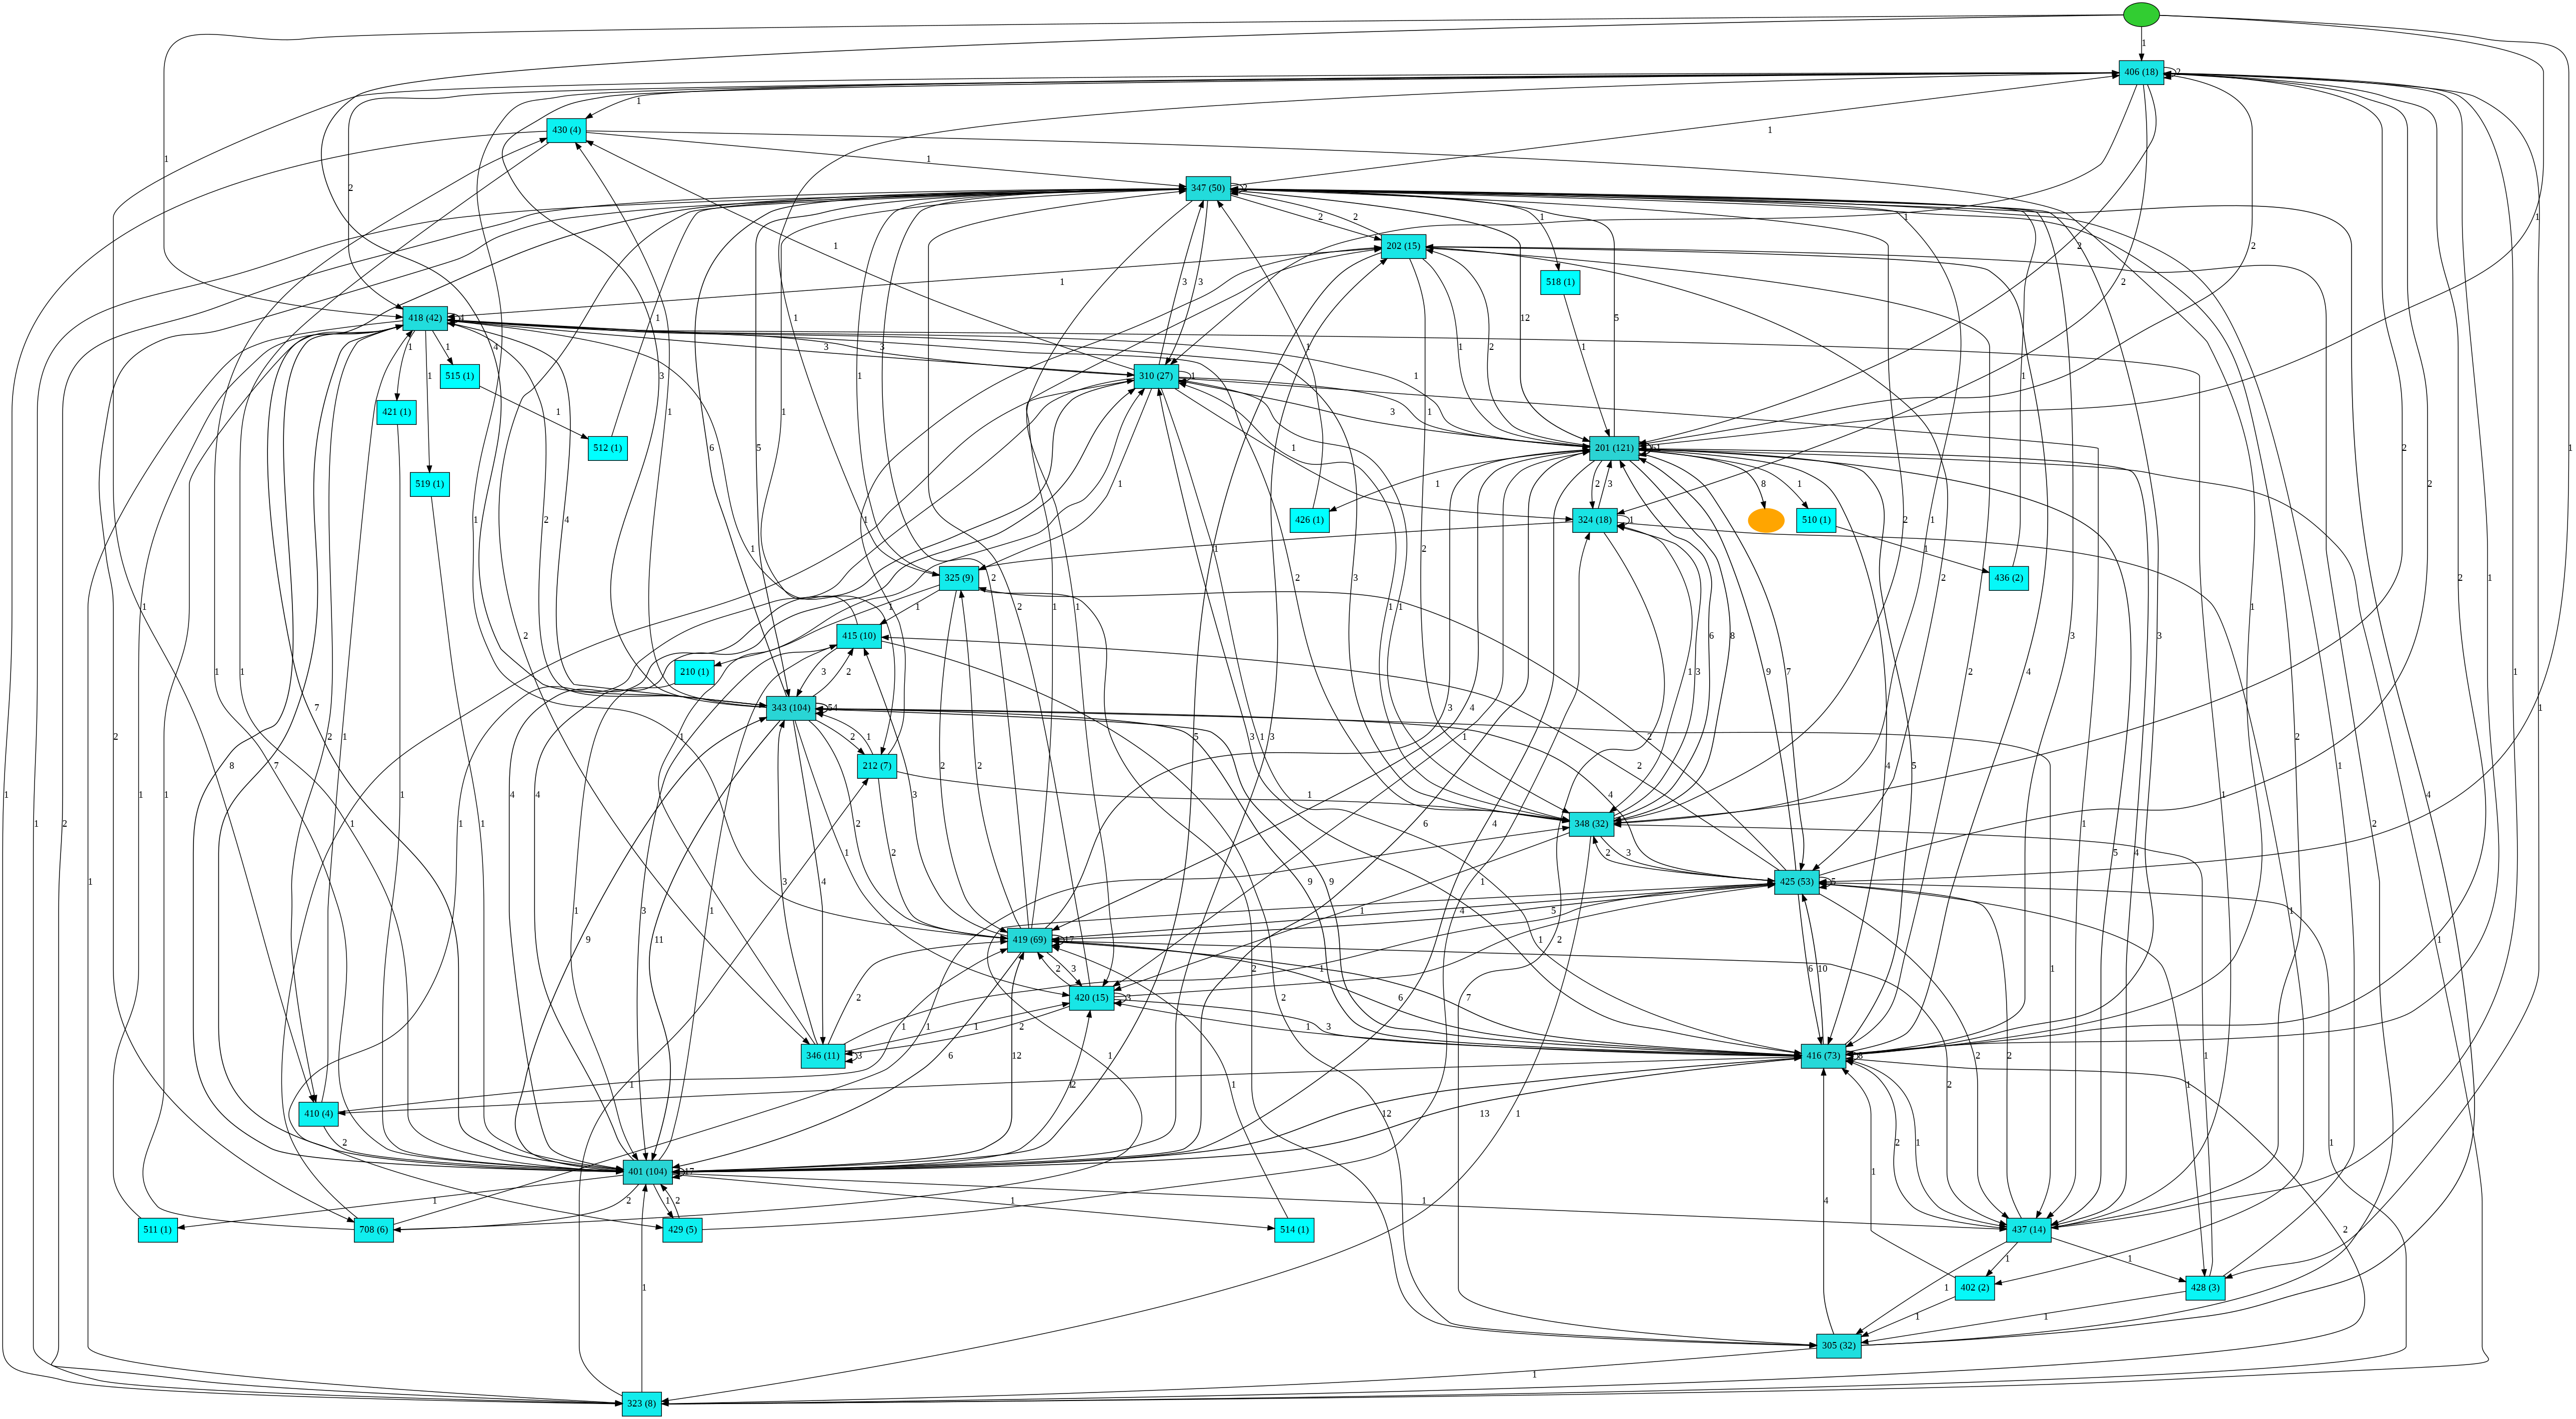

In [79]:
heu_model = pm4py.discover_heuristics_net(df)
pm4py.view_heuristics_net(heu_model)

In [82]:
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery

# viz
from pm4py.visualization.petrinet import visualizer as pn_visualizer
from pm4py.visualization.process_tree import visualizer as pt_visualizer
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer
from pm4py.visualization.dfg import visualizer as dfg_visualization

/usr/local/lib/python3.7/dist-packages/pm4py/visualization/petrinet/__init__.py:20: UserWarning: please use the pm4py.visualization.petri_net package instead
  warnings.warn("please use the pm4py.visualization.petri_net package instead")


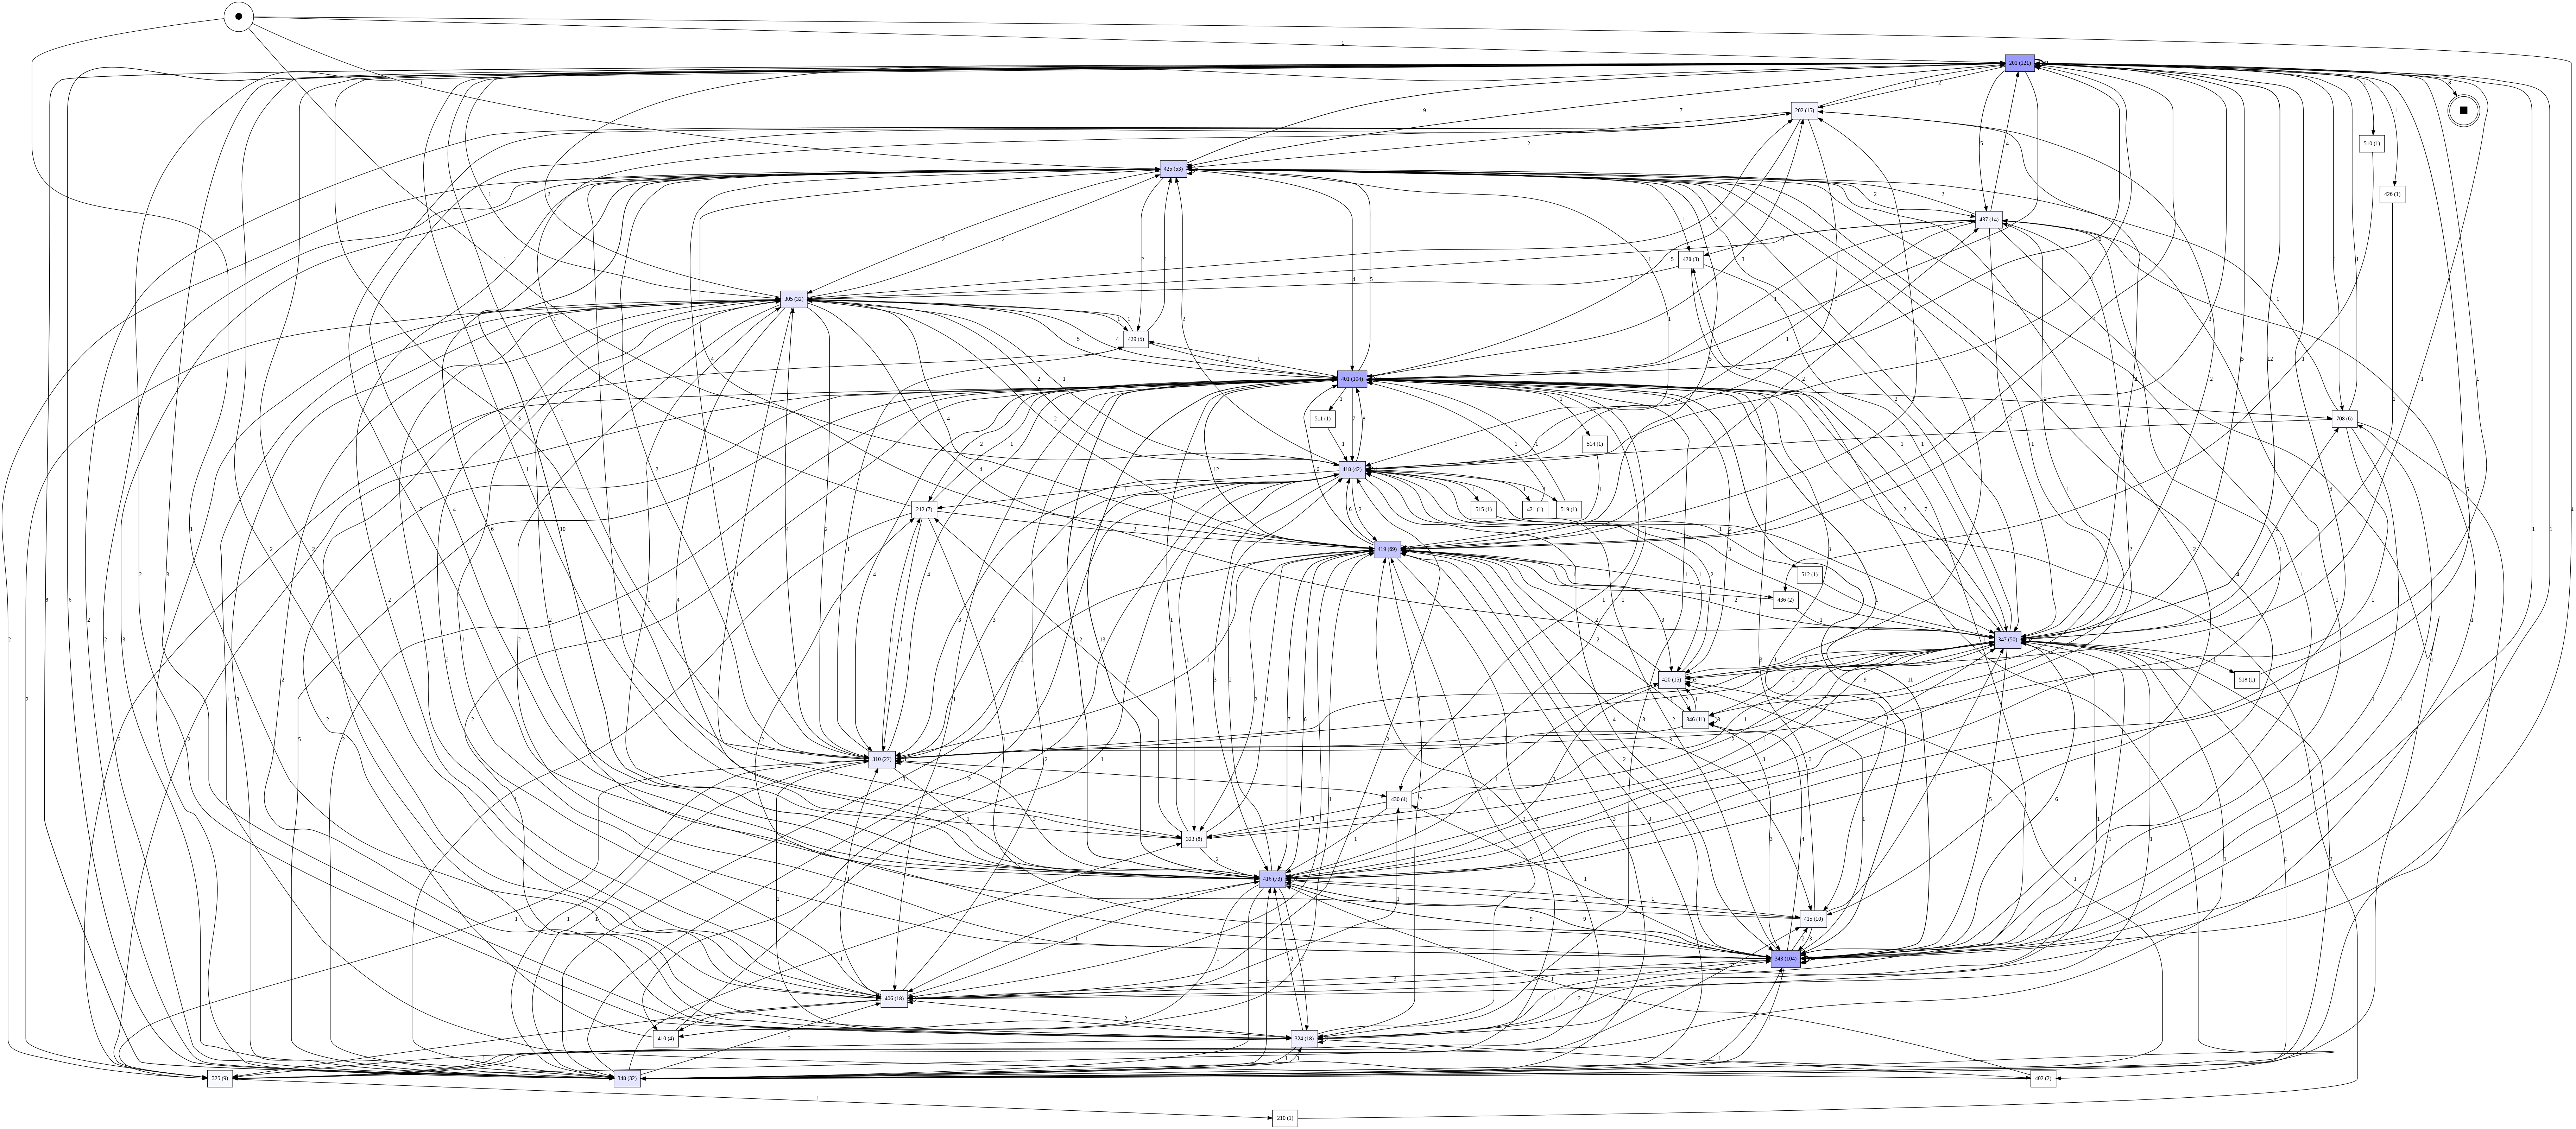

In [83]:
dfg, start_activities, end_activities = pm4py.discover_dfg(df)
pm4py.view_dfg(dfg,start_activities,end_activities)


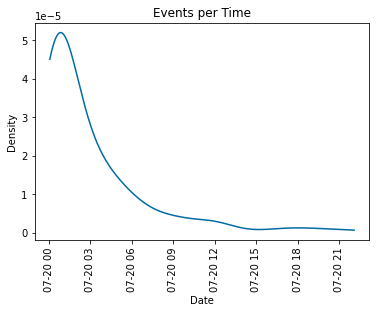

In [85]:
from pm4py.algo.filtering.log.attributes import attributes_filter

x, y = attributes_filter.get_kde_date_attribute(df, attribute="time:timestamp")

from pm4py.visualization.graphs import visualizer as graphs_visualizer

gviz = graphs_visualizer.apply_plot(x, y, variant=graphs_visualizer.Variants.DATES)
graphs_visualizer.view(gviz)

# Comparison of graphs builded based on Section/unique well/Phase

In [86]:
data = pd.read_excel('/content/drive/MyDrive/Drill planner/Data/Dataset2.xlsx')
data['Operation code'] = data['Operation code'].astype(int)

In [ ]:
def metric_calc(data,miner_list: list,id_column='Phase'):

  data_holder = DataHolder(data=data, 
                         id_column=id_column, 
                         activity_column='Operation code', 
                         start_timestamp_column='Timestamp', 
                         time_format='%Y.%m.%d')
  planner_miner = DrillPlaner(SimpleMiner,data_holder,data,['Time, days'],stats)
  miner_dfg = planner_miner.digraph()
  
  pure_miners = [CausalMiner,SimpleMiner,HeuMiner]
  for i in range(0,len(pure_miners)):
    miner_list[i] = DrillPlaner(pure_miners[i],data_holder,data,['Time, days'],stats)

  miner_names = ['Causal miner','Simple miner','Heuristic miner']
  jacc_metric = []
  beh_metric = []
  for i,miner in enumerate(miner_list):
    try:
      metric = planner_miner.IoU_metric(miner)
      metric2 = planner_miner.NAM_metric(miner)
      print('-----')
      print(f'Metrics for {miner_names[i]}')
      print(f'Jaccard index:{metric}')
      jacc_metric.append(metric)
      print(f'Behavioral similarity metric:{metric2} \n')
      beh_metric.append(metric2)
    except:
      print(f'Jaccard index для майнера {miner} не подсчитана')
      continue

  graph_planner = DrillGraphMiner(data, 'Time, h (in grains)', 'Operation code',prepare_dataset=False)
  DFG = graph_planner.to_dfg()

  all_nodes = list(set(planner_miner.graph_nodes).union(set(planner_miner.graph_nodes)))
  NAM1 = np.zeros((len(all_nodes), len(all_nodes)))
  NAM2 = np.copy(NAM1)
  for NAM, graph in ((NAM1, planner_miner),(NAM2, graph_planner)):
      for edge in graph.graph_edges:
          i = all_nodes.index(edge[0])
          j = all_nodes.index(edge[1])
          NAM[i,j] = 1
  dfg_jacc = len(set(planner_miner.graph_nodes).intersection(set(dfg2)))/len(set(planner_miner.graph_nodes).union(set(dfg2)))
  beh_dfg = np.trace((NAM1-NAM2).T@(NAM1-NAM2))
  print('-----')
  print('Metrics for DFG graph')
  print('Jaccard index for DFG graph',dfg_jacc)
  print('Behavioral similarity for DFG graph ',beh_dfg,'\n')
  beh_metric.append(beh_dfg)
  jacc_metric.append(metric)

  return jacc_metric,beh_metric

## By phases

In [ ]:
# Miner
causal_miner = CausalMiner(data_holder)
simple_miner = SimpleMiner(data_holder)
heu_miner = HeuMiner(data_holder)
alpha_plus_miner = AlphaPlusMiner(data_holder)
inductive_miner = InductiveMiner(data_holder)
alpha_miner = AlphaMiner(data_holder)

miners = [causal_miner,simple_miner,heu_miner,alpha_plus_miner] #alpha_miner]
pure_miners = [CausalMiner,SimpleMiner,HeuMiner,AlphaPlusMiner,AlphaMiner]#InductiveMiner]
for i in miners:
  i.apply()

graph = simple_miner.graph


# Visualization
#painter = GraphvizPainter()
#painter.apply(graph)
#painter.show()

In [ ]:
simple_planner_miner = DrillPlaner(SimpleMiner,data_holder,data,['Time, days'],stats)
#miner_dfg = planner_miner.digraph()

In [ ]:
for i in list(data['Phase'].unique()):
  phase_data = data[data['Phase']==i]
  print('.............')
  print(f'Метрики для фазы {i}')
  jacc_metric = []
  beh_metric = []
  a, b = metric_calc(phase_data,pure_miners,id_column='Well number')
  jacc_metric.append(np.array(a))
  beh_metric.append(np.array(b))
print('Mean results')
print('Jaccard coef',np.array(jacc_metric).mean())
print('Behavioral similarity metric',np.array(beh_metric).mean())



.............
Метрики для фазы БУРНАП
-----
Metrics for Causal miner
Jaccard index:1.0
Behavioral similarity metric:22.0 

-----
Metrics for Simple miner
Jaccard index:1.0
Behavioral similarity metric:0.0 

-----
Metrics for Heuristic miner
Jaccard index:1.0
Behavioral similarity metric:57.0 

Jaccard index для майнера <class 'sberpm.miners._alpha_plus_miner.AlphaPlusMiner'> не подсчитана
Jaccard index для майнера <class 'sberpm.miners._alpha_miner.AlphaMiner'> не подсчитана
-----
Metrics for DFG graph
Jaccard index for DFG graph 0.43902439024390244
Behavioral similarity for DFG graph  6.0 

.............
Метрики для фазы КРЕПНАП
-----
Metrics for Causal miner
Jaccard index:1.0
Behavioral similarity metric:4.0 

-----
Metrics for Simple miner
Jaccard index:1.0
Behavioral similarity metric:0.0 

-----
Metrics for Heuristic miner
Jaccard index:1.0
Behavioral similarity metric:11.0 

Jaccard index для майнера <class 'sberpm.miners._alpha_plus_miner.AlphaPlusMiner'> не подсчитана
Jaccard i

/usr/local/lib/python3.7/dist-packages/sberpm/_holder.py:277: UserWarning: DataHolder: column Well number has 1 None values, the corresponding rows will be removed.
  f'the corresponding rows will be removed.', UserWarning)


Jaccard index для майнера <class 'sberpm.miners._alpha_miner.AlphaMiner'> не подсчитана
-----
Metrics for DFG graph
Jaccard index for DFG graph 0.627906976744186
Behavioral similarity for DFG graph  9.0 

.............
Метрики для фазы ГИСКОН
-----
Metrics for Causal miner
Jaccard index:1.0
Behavioral similarity metric:1.0 

-----
Metrics for Simple miner
Jaccard index:1.0
Behavioral similarity metric:0.0 

-----
Metrics for Heuristic miner
Jaccard index:1.0
Behavioral similarity metric:3.0 

Jaccard index для майнера <class 'sberpm.miners._alpha_plus_miner.AlphaPlusMiner'> не подсчитана
Jaccard index для майнера <class 'sberpm.miners._alpha_miner.AlphaMiner'> не подсчитана
-----
Metrics for DFG graph
Jaccard index for DFG graph 0.04878048780487805
Behavioral similarity for DFG graph  6.0 

.............
Метрики для фазы БУРЭК
-----
Metrics for Causal miner
Jaccard index:1.0
Behavioral similarity metric:92.0 

-----
Metrics for Simple miner
Jaccard index:1.0
Behavioral similarity metri

## By well

In [ ]:
jacc_metric = []
beh_metric = []
a, b = metric_calc(data,pure_miners,id_column='Well number')
jacc_metric.append(np.array(a))
beh_metric.append(np.array(b))
print('Mean results')
print('Jaccard coef',np.array(jacc_metric).mean())
print('Behavioral similarity metric',np.array(beh_metric).mean())


/usr/local/lib/python3.7/dist-packages/sberpm/_holder.py:277: UserWarning: DataHolder: column Well number has 1 None values, the corresponding rows will be removed.
  f'the corresponding rows will be removed.', UserWarning)


-----
Metrics for Causal miner
Jaccard index:1.0
Behavioral similarity metric:426.0 

-----
Metrics for Simple miner
Jaccard index:1.0
Behavioral similarity metric:0.0 

-----
Metrics for Heuristic miner
Jaccard index:1.0
Behavioral similarity metric:715.0 

Jaccard index для майнера <class 'sberpm.miners._alpha_plus_miner.AlphaPlusMiner'> не подсчитана
Jaccard index для майнера <class 'sberpm.miners._alpha_miner.AlphaMiner'> не подсчитана
-----
Metrics for DFG graph
Jaccard index for DFG graph 0.31932773109243695
Behavioral similarity for DFG graph  15.0 

Mean results
Jaccard coef 1.0
Behavioral similarity metric 289.0


## By section

In [ ]:
for i in list(data['Section'].unique()):
  section_data = data[data['Section']==i]
  print('.............')
  print(f'Метрики для секции {i}')
  metric_calc(section_data,pure_miners,id_column='Well number')
  jacc_metric = []
  beh_metric = []
  a, b = metric_calc(section_data,pure_miners,id_column='Well number')
  jacc_metric.append(np.array(a))
  beh_metric.append(np.array(b))
print('Mean results')
print('Jaccard coef',np.array(jacc_metric).mean())
print('Behavioral similarity metric',np.array(beh_metric).mean())



.............
Метрики для секции Направление
-----
Metrics for Causal miner
Jaccard index:1.0
Behavioral similarity metric:26.0 

-----
Metrics for Simple miner
Jaccard index:1.0
Behavioral similarity metric:0.0 

-----
Metrics for Heuristic miner
Jaccard index:1.0
Behavioral similarity metric:67.0 

Jaccard index для майнера <class 'sberpm.miners._alpha_plus_miner.AlphaPlusMiner'> не подсчитана
Jaccard index для майнера <class 'sberpm.miners._alpha_miner.AlphaMiner'> не подсчитана
-----
Metrics for DFG graph
Jaccard index for DFG graph 0.40425531914893614
Behavioral similarity for DFG graph  7.0 

-----
Metrics for Causal miner
Jaccard index:1.0
Behavioral similarity metric:26.0 

-----
Metrics for Simple miner
Jaccard index:1.0
Behavioral similarity metric:0.0 

-----
Metrics for Heuristic miner
Jaccard index:1.0
Behavioral similarity metric:67.0 

Jaccard index для майнера <class 'sberpm.miners._alpha_plus_miner.AlphaPlusMiner'> не подсчитана
Jaccard index для майнера <class 'sberpm

/usr/local/lib/python3.7/dist-packages/sberpm/_holder.py:277: UserWarning: DataHolder: column Well number has 1 None values, the corresponding rows will be removed.
  f'the corresponding rows will be removed.', UserWarning)
/usr/local/lib/python3.7/dist-packages/sberpm/_holder.py:277: UserWarning: DataHolder: column Well number has 1 None values, the corresponding rows will be removed.
  f'the corresponding rows will be removed.', UserWarning)


-----
Metrics for Heuristic miner
Jaccard index:1.0
Behavioral similarity metric:228.0 

Jaccard index для майнера <class 'sberpm.miners._alpha_plus_miner.AlphaPlusMiner'> не подсчитана
Jaccard index для майнера <class 'sberpm.miners._alpha_miner.AlphaMiner'> не подсчитана
-----
Metrics for DFG graph
Jaccard index for DFG graph 0.48484848484848486
Behavioral similarity for DFG graph  13.0 

-----
Metrics for Causal miner
Jaccard index:1.0
Behavioral similarity metric:128.0 

-----
Metrics for Simple miner
Jaccard index:1.0
Behavioral similarity metric:0.0 

-----
Metrics for Heuristic miner
Jaccard index:1.0
Behavioral similarity metric:228.0 

Jaccard index для майнера <class 'sberpm.miners._alpha_plus_miner.AlphaPlusMiner'> не подсчитана
Jaccard index для майнера <class 'sberpm.miners._alpha_miner.AlphaMiner'> не подсчитана
-----
Metrics for DFG graph
Jaccard index for DFG graph 0.48484848484848486
Behavioral similarity for DFG graph  13.0 

.............
Метрики для секции Эксплуата